<a href="https://colab.research.google.com/github/M-MSilva/Predict-The-Status-of-Loan_End-to-End-Project/blob/master/ColabProject/Loan_Application_Forecast_End_to_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Application Forecast - End-to-End Project 

In this project, we aim to categorize customers who may or may not receive loans, based on information about the customer's conditions.

## 1 - Requirements

First we must import some libraries that we will use throughout the code.

In [49]:
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

import matplotlib.pyplot as plt #for the graphics

import numpy as np

import seaborn as sns

import matplotlib as mpl

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

%matplotlib inline

sns.set_theme()



## 2 - Get the data

We then collect data from the website: https://www.kaggle.com/vipin20/loan-application-data

In [50]:
dataset = pd.read_csv('https://raw.githubusercontent.com/M-MSilva/Predict-The-Status-of-Loan-End-to-End-Project/master/Dataset/LOAN.csv',  on_bad_lines='skip',decimal='.', thousands=',',encoding='utf-8')



## 3 - Initial Data Insights

Now to better understand the dataframe we must show its first rows.

In [51]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In the dataset, each row characterizes an applicant who has 13 attributes. Of these attributes, many are easy to understand, so I have outlined a few:

* ApplicantIncome: Applicant's Total Income;
* CoapplicantIncome: Income from someone close, which will possibly help the
individual pay off the debt;
* Loan_Amount_Term: Installments ex: 360 = 12 months;
* Credit_History = 1 if the individual has a good credit history, 0 otherwise;
* Loan_Status = means whether the loan will be approved or not.

In [52]:
dataset.info()#to have a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
#statistical information
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 5 - Understanding the data

Now let's try to understand the data better and make some assumptions, from graphs extracted from the dataframe data.

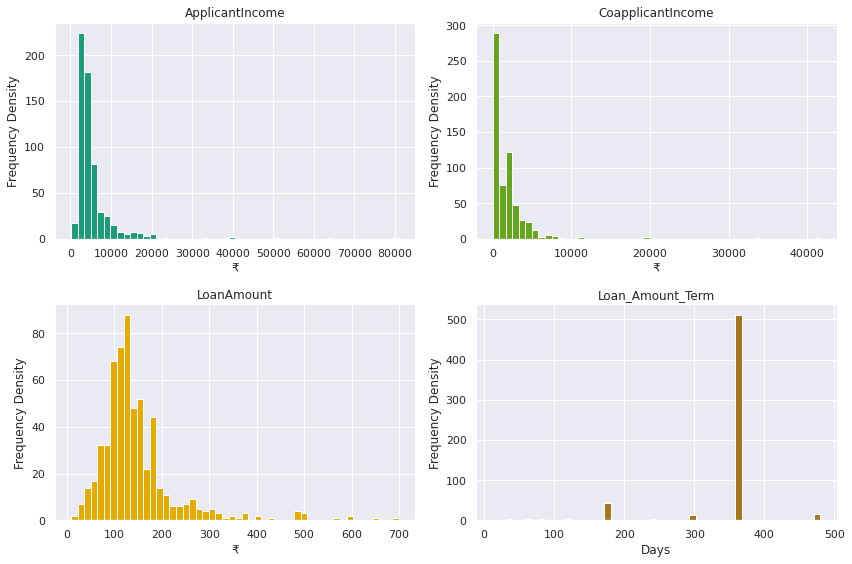

In [54]:
cmap = mpl.cm.Dark2

listA = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
fig=plt.figure(figsize=(12, 8))


for i, x in enumerate(listA):
  ax=fig.add_subplot(2,2,i+1)
  dataset[x].hist(bins=50,ax=ax,color=cmap(i/ float((i + 1))))
  if(x == 'Loan_Amount_Term'):
    ax.set_xlabel('Days')
  else:
    ax.set_xlabel('₹')
  ax.set_ylabel('Frequency Density')
  ax.set_title(x)
fig.tight_layout()
plt.show()

In the graphs above we notice that the highest occurrences for Applicant's Income, Coapplicant's Income, Loan Amount, Term of Loan Amount are respectively ₹ 200,  ₹ 100, ₹ 120,  370 days approximately. The important thing to ask is, are people who have a higher income, or who apply for a higher loan amount, more likely to receive the loan ?

Also, in our data data an interesting thing is that we have a lot of categorical data, so we'll see what we can get from that.

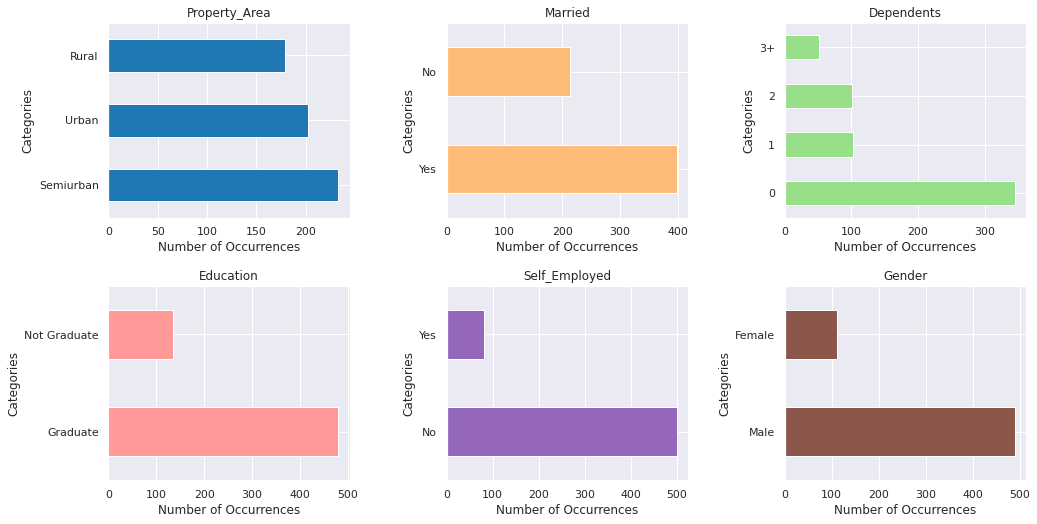

In [55]:
cmap2 = mpl.cm.tab20

listFirst = ['Property_Area','Married','Dependents','Education','Self_Employed','Gender']

fig=plt.figure(figsize=(10,8))

for i, col in enumerate(listFirst):
  ax=fig.add_subplot(3,3,i+1)
  plt.xlabel('Number of Occurrences')
  plt.ylabel('Categories')
  valuec = dataset[col].value_counts().plot(kind='barh',title=col,color=cmap2(i/ float((i + 5))),grid=True,ax=ax)
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.35, 
                    wspace=0.4, 
                    hspace=0.35)
plt.show()

In these data we have, for example 233 people living in Semi-Urban areas, 202 people living in Urban areas and 179 cities living in Rural areas. In this way, another important issue comes into play. People who live in what type of area are most likely to receive a loan? This question and the previous one we will investigate in this project.




## 6 - Stratified Sampling:

To perform the stratified population, we take subpopulations of a population and use the slicing method to subdivide the data. Stratification must be done, because if our dataset has a lot of data of a single type, our model may notice some wrong trend. But first we need to know which is the highest income and the lowest income:


In [56]:
print('Maximum : ₹ ', max(dataset['ApplicantIncome']))
print('Minimum : ₹ ', min(dataset['ApplicantIncome']))

Maximum : ₹  81000
Minimum : ₹  150


we change some null data

In [57]:

dataset['Credit_History'].fillna(dataset['Credit_History'].median(),inplace = True)
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

We use the cut method and plot its content.

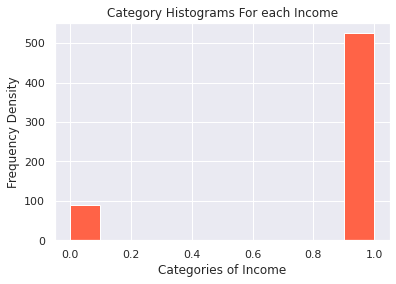

In [58]:
dataset["hist_cat"] = pd.cut(dataset["Credit_History"],
                               bins=[-1,0.5,1.5],
                               labels=[0,1])

plt.xlabel('Categories of Income')
plt.ylabel('Frequency Density')
plt.title('Category Histograms For each Income')
dataset['hist_cat'].hist(color='tomato')
plt.show()

After breaking down the populations, we actually performed the stratification.

In [59]:
dataset.replace({'Loan_Status':{'Y': 1, 'N':0}},inplace=True)# I need to do this

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["hist_cat"]):
    strat_train_set = dataset.iloc[train_index]
    strat_test_set = dataset.iloc[test_index]

To check the consistency of our stratification we make the comparison:

In [60]:
print(strat_train_set['hist_cat'].value_counts()/len(strat_train_set))

1    0.855397
0    0.144603
Name: hist_cat, dtype: float64


In [61]:
print(dataset['hist_cat'].value_counts()/len(dataset))

1    0.855049
0    0.144951
Name: hist_cat, dtype: float64


and we noticed a consistency in the results.

## 7 - Returning the data to the original state

In [62]:
import warnings
warnings.filterwarnings("ignore")

strat_train_set.drop('hist_cat',axis=1, inplace=True)
strat_test_set.drop('hist_cat',axis=1, inplace=True)

## 8 - Data Visualization

To better interpret the concepts and notice patterns, let's visualize the data, which will also help us understand the possible decisions of our algorithm.

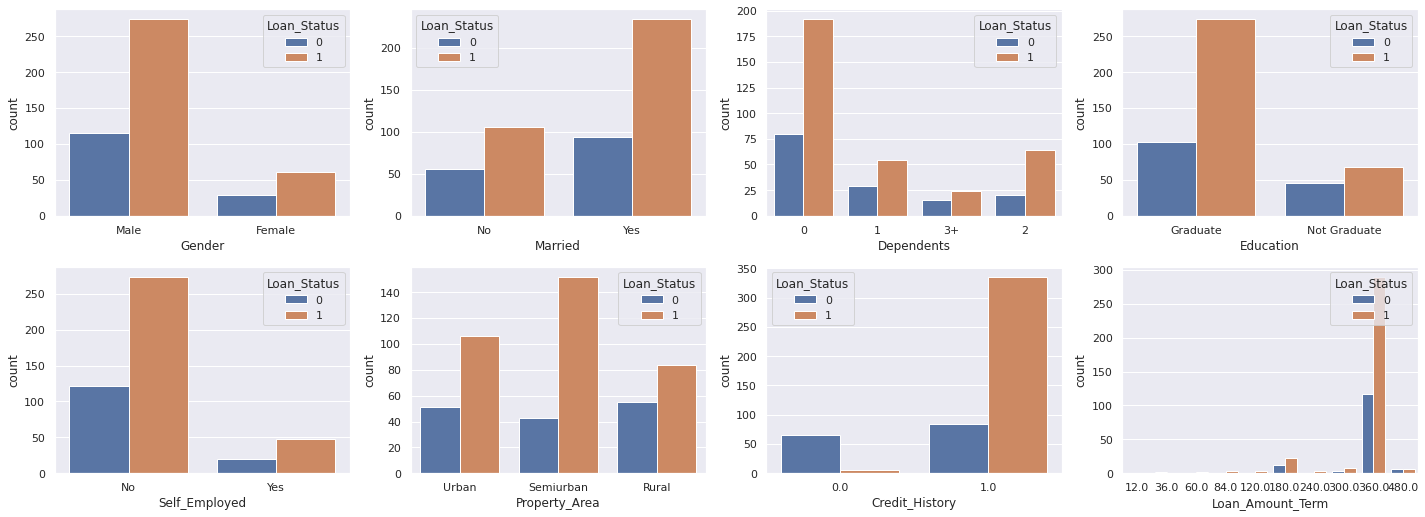

In [63]:
dataset = strat_train_set.copy()

listaB = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']

fig=plt.figure(figsize=(20, 14))

for i, col in enumerate(listaB):
  ax=fig.add_subplot(4,4,i+1)
  sns.countplot(x=col,hue='Loan_Status', data=dataset, ax=ax)
fig.tight_layout()
plt.show()

The graph above is self-explanatory, it seems to indicate that married, childless, college-educated, non-self-employed men who live in semi-urban areas, who have a good credit history and who make 360-day payments are supposedly more likely to receive loans.

Above we find a supposed answer to one of our questions raised in section 5, the other question asked outside whether there is any relationship between the applicant's income and the possibility of receiving loans. To speculate this question, we are going to plot a pairplot plot, which relates two variables simultaneously, in addition, we are going to distinguish in this data those who receive loans and those who do not.


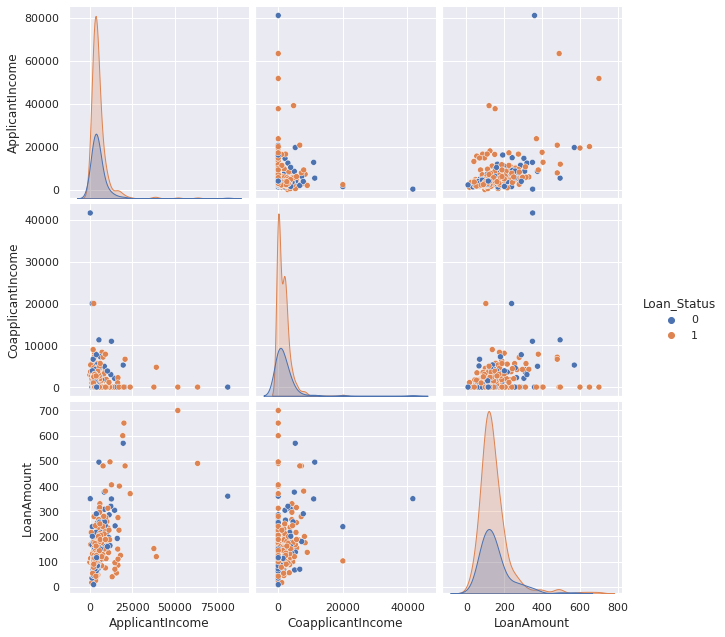

In [64]:
selected_columns = dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']]

DATA2 = selected_columns.copy()

sns.pairplot(data=DATA2, hue="Loan_Status",height=3)
plt.show()

From the graph above, it appears that for smaller amounts of applicant income, the co-applicant and loan amount are those that are usually approved for loan. Despite this, we cannot claim anything, as it may be that people with higher incomes do not take out loans, or our data lack information about this type of population. Maybe later we'll say something.

Since the graph above didn't make any good statements, let's now plot a heatmap graph by re-correlating two data points and using a third ApplicantIncome value to tell us the magnitude of the Applicant Income for each bi-value. For example, in the chart below we can see the Applicant Income of women and men and whether they are married or not.

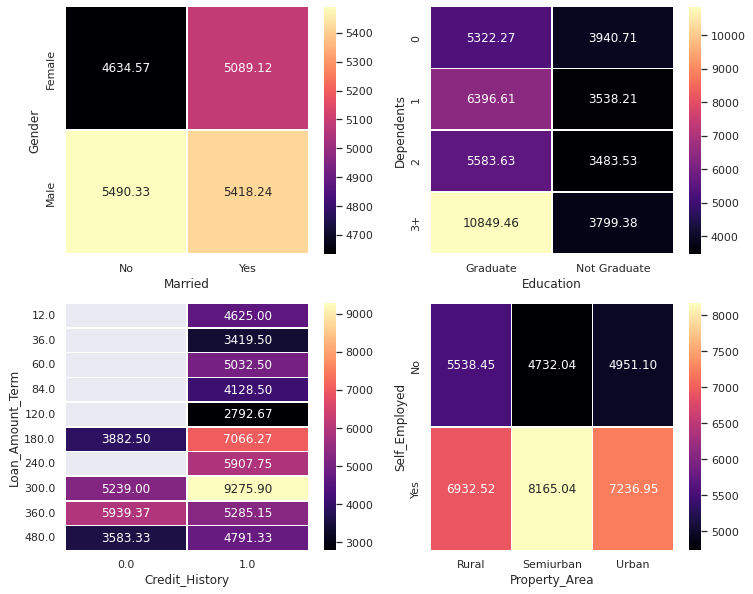

In [65]:
List1 = ['Gender','Dependents','Loan_Amount_Term','Self_Employed']
List2 = ['Married','Education','Credit_History','Property_Area']

num = [0,1,2,3]

fig=plt.figure(figsize=(12, 10))
for (z,j,k) in zip(num,List1 ,List2):                   
  infos = dataset.pivot_table(index=j,columns=k,values="ApplicantIncome")
  ax=fig.add_subplot(2,2,z+1)
  sns.heatmap(infos, annot=True, fmt='.2f', linewidths=.5, ax=ax,cmap=plt.get_cmap("magma"))

To make the assumptions, let's look at some information from Applicant Income:

In [66]:
dataset['ApplicantIncome'].describe()

count      491.000000
mean      5439.002037
std       6307.141778
min        210.000000
25%       2816.000000
50%       3813.000000
75%       5818.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Based on this information and the graph above, we note that some married men, people without children and graduates, individuals who request a lot of tuition with a good track record and people who are not self-employed, who live in semi-urban areas have incomes below the average ~ ₹ 5255.00 are more likely to receive a loan. From our first graph in section 7, we understand that these groups surveyed here would likely receive credit, as these groups fall into positive credit status. While these groups of people with below-average incomes indicate a likely certainty of receiving credit, the only certainty we can have will be with the implementation of the machine learning model, but these insights are precious.

## 9 - Exploratory Data Analysis and Feature Engineering

### 9.1 Search for Correlations

Let's now concern ourselves in how variables depend on each other in our dataset. To measure the correlation coefficient we will use the corr() method.

In [67]:
dataset2 = dataset.copy()
dataset2.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':1,'Urban':2,'Semiurban':3},
                 'Education':{'Graduate':1,'Not Graduate':0}, 'Loan_Status':{'Y': 1, 'N':0}},inplace=True)


dataset2 = dataset2.replace(to_replace='3+', value=4)

In [68]:
Matrix_corr = dataset2.corr()
Matrix_corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.405722,-0.053269,-0.014490,0.040490,0.073181,0.110275,-0.069321,0.018734,-0.135409,0.022654
Married,0.405722,1.000000,0.006427,0.011515,0.034075,0.122165,0.160827,-0.076085,-0.003450,-0.044300,0.058268
Education,-0.053269,0.006427,1.000000,0.028888,0.145866,0.074011,0.184780,0.048278,0.103074,0.094496,0.119663
Self_Employed,-0.014490,0.011515,0.028888,1.000000,0.149926,-0.003826,0.141674,-0.041347,-0.012250,-0.015482,0.009393
ApplicantIncome,0.040490,0.034075,0.145866,0.149926,1.000000,-0.105970,0.535478,-0.018667,-0.000197,-0.029237,0.010046
CoapplicantIncome,0.073181,0.122165,0.074011,-0.003826,-0.105970,1.000000,0.261148,-0.073385,-0.012770,-0.024275,-0.056199
LoanAmount,0.110275,0.160827,0.184780,0.141674,0.535478,0.261148,1.000000,0.072627,0.003466,-0.037761,-0.031169
Loan_Amount_Term,-0.069321,-0.076085,0.048278,-0.041347,-0.018667,-0.073385,0.072627,1.000000,-0.005122,0.017711,-0.002759
Credit_History,0.018734,-0.003450,0.103074,-0.012250,-0.000197,-0.012770,0.003466,-0.005122,1.000000,0.057408,0.547335
Property_Area,-0.135409,-0.044300,0.094496,-0.015482,-0.029237,-0.024275,-0.037761,0.017711,0.057408,1.000000,0.157239


The correlation coefficient close to 1 reveals a positive correlation between the data, if the correlation coefficient is close to -1 it expresses a negative correlation. For example, loan status has a strong correlation with credit history, and the lower the Coaplicant's salary, the lower the applicant's salary, as its correlation coefficient is close to -1.

Furthermore, we can look at the data in the form of a heat map.

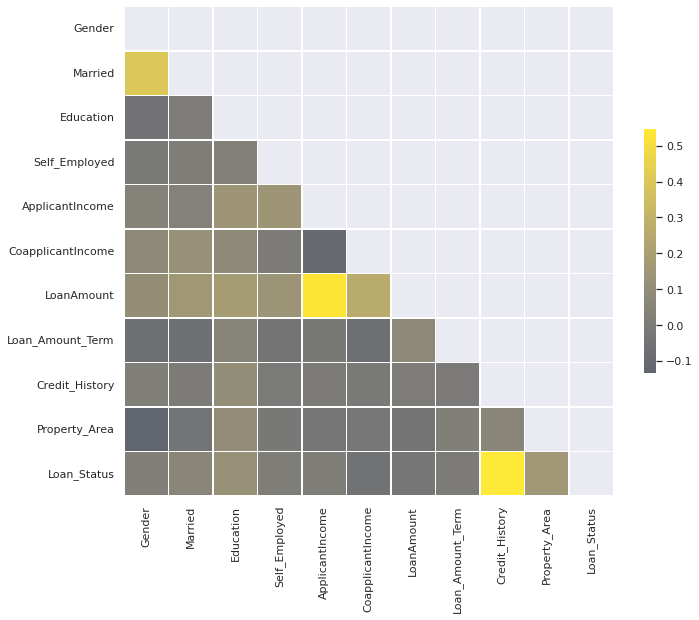

In [69]:
mask = np.triu(np.ones_like(Matrix_corr))

f,ax = plt.subplots(figsize=(11,9))

sns.heatmap(Matrix_corr,mask=mask,cmap=plt.get_cmap("cividis"),center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()

The conclusions seem to be the same, and we note the strong relationship between credit history and loan status.

### 9.2 - Creating New Data

We will now make resource combinations to create new data.

In [70]:
def feature_engineering(data):
  data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
  data['Loan_Term_per_T_Income'] = data['Loan_Amount_Term']/data['CoapplicantIncome'] #installments per couple or helpers
  data['LoanA_per_Total_Income'] = data['LoanAmount']/data['CoapplicantIncome'] #Loan Amount by Total Income

  return data

In [71]:
corr_m = feature_engineering(dataset2).corr() #TOTAL
corr_m["Loan_Status"].sort_values(ascending=False)

Loan_Status               1.000000
Credit_History            0.547335
Property_Area             0.157239
Education                 0.119663
Married                   0.058268
Loan_Term_per_T_Income    0.049667
LoanA_per_Total_Income    0.048369
Gender                    0.022654
ApplicantIncome           0.010046
Self_Employed             0.009393
Loan_Amount_Term         -0.002759
Total_Income             -0.014368
LoanAmount               -0.031169
CoapplicantIncome        -0.056199
Name: Loan_Status, dtype: float64

In [72]:
corr_m = feature_engineering(dataset2).corr()#Aplicant
corr_m["Loan_Status"].sort_values(ascending=False)

Loan_Status               1.000000
Credit_History            0.547335
Property_Area             0.157239
Education                 0.119663
Married                   0.058268
Loan_Term_per_T_Income    0.049667
LoanA_per_Total_Income    0.048369
Gender                    0.022654
ApplicantIncome           0.010046
Self_Employed             0.009393
Loan_Amount_Term         -0.002759
Total_Income             -0.014368
LoanAmount               -0.031169
CoapplicantIncome        -0.056199
Name: Loan_Status, dtype: float64

In [73]:
corr_m = feature_engineering(dataset2).corr()#Coaplicant
corr_m["Loan_Status"].sort_values(ascending=False)

Loan_Status               1.000000
Credit_History            0.547335
Property_Area             0.157239
Education                 0.119663
Married                   0.058268
Loan_Term_per_T_Income    0.049667
LoanA_per_Total_Income    0.048369
Gender                    0.022654
ApplicantIncome           0.010046
Self_Employed             0.009393
Loan_Amount_Term         -0.002759
Total_Income             -0.014368
LoanAmount               -0.031169
CoapplicantIncome        -0.056199
Name: Loan_Status, dtype: float64

Although small, Loan Amount per Total Income is more closely tied to Loan Status than Loan Amount. Also, Loan amount Term per Total Income gives us more valuable information than Loan Amount Term. Similarly, Total Income is more closely associated with Loan Status than Applicant Income and Co-Applicant Income. The latter is undeniable, as the joint income of a couple is more relevant for the realization of a loan, than the income that only one person has, in this way, loans for people with lower wages tend to be accepted more frequently in our data. Dice. We arrive at the same statement as in section 8.


Despite all this, we will not implement the model with this new data, as we have many values ​​that would give nan and zeros that divided would give nan.

### 9.3 Prepare the Data

In [74]:
dataset = strat_train_set.drop("Loan_Status", axis=1) # drop labels for training set
dataset_labels = strat_train_set["Loan_Status"].copy()

dataset_num = dataset.select_dtypes(include=[np.number])#only the numerical data

### 9.4 Transformations by Pipelines

As seen so far, our data has many imperfections, to remedy some of these limitations, we employ a pepilines transformation that sequentially employs several transformations and a final estimator.
In our pipeline:


1.  First, we fill in data that is missing from the database, with the median of the column;
2.   We apply RobustScaler(), to remove out-of-curve points and scale data between 25% of the sample and 75% of the sample;
3. Finally, we use the StandardScaler, which makes the data have similar weights, so that this normalization induces our data to be in a range from 0 to 1.




In [75]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('rbscaler',RobustScaler()),
        ('std_scaler', StandardScaler()),
        
    ])

dataset_num_tr = num_pipeline.fit_transform(dataset_num)

In [76]:
print(list(dataset_num))

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Later, we joined our numerical and categorical data through the ColumnTransformer and used the OneHotEncoder method, to transform words into numbers, as the models do not understand words, only numbers.
We turn names into numbers such as labels that the pc understands.


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = list(dataset_num)
cat_attribs = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])


dataset_before = full_pipeline.fit_transform(dataset)

Finally, we apply the SMOTE() method, which oversamples the minority class and balances the distribution of classes, despite not providing additional content to the model.

In [78]:

from imblearn.over_sampling import SMOTE


dataset_prepared, dataset_labels = SMOTE().fit_resample(dataset_before, dataset_labels)

## 10 - Choose and Train The Model

In the k-nearest neighbor model, objects are classified according to the plural vote of their neighbors, where each object is assigned the most similar class among its k-nearest neighbors.

In [79]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 15)

clf.fit(dataset_prepared, dataset_labels)

KNeighborsClassifier(n_neighbors=15)

Our algorithm is already qualified, however, we will search for several hyperparameters to be tested in our model using cross validation. For this purpose we will use the randomized search.

In [80]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : [3,5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv=3,
    n_jobs = -1,
    scoring='roc_auc'
)

clf = gs.fit(dataset_prepared, dataset_labels)

print('score: {:.3f}'
     .format(clf.score(dataset_prepared, dataset_labels)))

Fitting 3 folds for each of 168 candidates, totalling 504 fits
score: 1.000


We found the best parameters:

In [81]:
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')

Best parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.8987252487945009


Although our model is good, it is overfitting , which is basically learning very well but only the training data, i.e. it's like our model is biased in the training data, and when it comes across new data, it won't behave well then I will apply n_neighbors = 15.

In [82]:
clf = KNeighborsClassifier(n_neighbors = 15)

clf.fit(dataset_prepared, dataset_labels)

KNeighborsClassifier(n_neighbors=15)

For a quick evaluation of the model, we used the Mean Square Error, which measured the mean squared difference between the recorded values ​​and the actual value.

In [83]:
from sklearn.metrics import mean_squared_error


dataset_predictions = clf.predict(dataset_prepared)
lin_mse = mean_squared_error(dataset_labels, dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


0.44095855184409843

Our model is good, because the closer to zero the better.

## 11 - Evaluation method in TRAINING SET

Now we will evaluate our model by applying the roc_curve curve and the auc value. The ROC curve describes the true positive rate by the false positive rate. In our case, we aim to have a high rate of true positives, as we would like to know the individuals who should receive the loan. The AUC value ranges from 0 to 1, and the closer to 1, the better are our estimates.


To have a ROC curve we need something to use as a reference in our decision threshold, what we use is the score, which if it is greater than the threshold it conceives the instance in the positive class, otherwise not. To get the scores of the instances, we use the cross_val_predict method.

In [84]:
from sklearn.model_selection import cross_val_predict 

y_scores_proba = cross_val_predict(clf, dataset_prepared, dataset_labels, cv=3,
                             method="predict_proba")

y_scores = y_scores_proba[:,1]

Having the scores in hand, we check recall and accuracy.

In [85]:
from sklearn.metrics import roc_curve,auc

pr, rec, thresholds = roc_curve(dataset_labels, y_scores)

Finally we plot the graph:

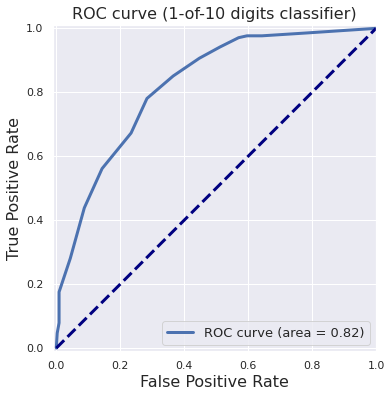

In [86]:
roc_auc_lr = auc(pr, rec)

fig, ax = plt.subplots(1, figsize= (8,6))
ax.set_aspect('equal') 
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])


#plots the roc curve, with its coordinates 
plt.plot(pr, rec, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)

#plots a list of values ​​that goes from zero to one, and how x = y is plotted a 45 degree line
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')#plot the stippling

plt.show()

## 12 - Implementation in Test Set

Finally, we do the same procedure as before, only now in our test set.

In [87]:
from sklearn.metrics import mean_squared_error

X_test = strat_test_set.drop("Loan_Status", axis=1)
y_test = strat_test_set["Loan_Status"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = clf.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [88]:
final_rmse

0.6181535578949711

In [89]:
from sklearn.model_selection import cross_val_predict

y_scores_proba = cross_val_predict(clf, X_test_prepared, y_test, cv=3,
                             method="predict_proba")


y_scores = y_scores_proba[:,1]

In [90]:
from sklearn.metrics import roc_curve,auc

pr, rec, thresholds = roc_curve(y_test, y_scores)

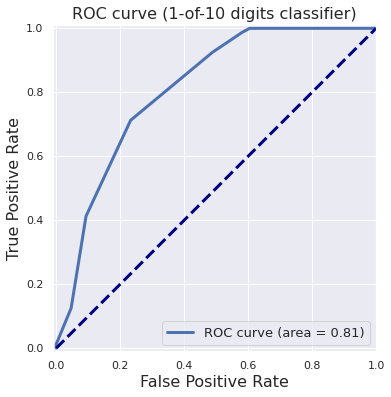

In [91]:
roc_auc_lr = auc(pr, rec)

fig, ax = plt.subplots(1, figsize= (8,6))
ax.set_aspect('equal') 
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])


#plots the roc curve, with its coordinates
plt.plot(pr, rec, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)

#plots a list of values ​​that goes from zero to one, and how x = y is plotted a 45 degree line
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--') #plot the stippling

plt.show()

Our model is great.

## 13 - To Deploy

### 13.1 - Saving the trained model

Now let's save the model, to deploy it later.

In [92]:
import pickle

We use a dump method, which takes the clf model as an input and writes our classifier in binary to the file "wb".

In [93]:
filename = 'trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

loading the saved model

In [94]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))